# Exploratory Data Analysis 
# Face it project

Performing an EDA on the Natural Human Face Images for Emotion Recognition dataset from Kaggle



In [10]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

In [5]:
base_dir = "../raw_data"

for root, dirs, files in os.walk(base_dir):
    print(root, ":", len(files))

../raw_data : 1
../raw_data/contempt : 208
../raw_data/fear : 570
../raw_data/surprise : 775
../raw_data/sadness : 746
../raw_data/neutrality : 524
../raw_data/happiness : 1406
../raw_data/anger : 890
../raw_data/disgust : 439


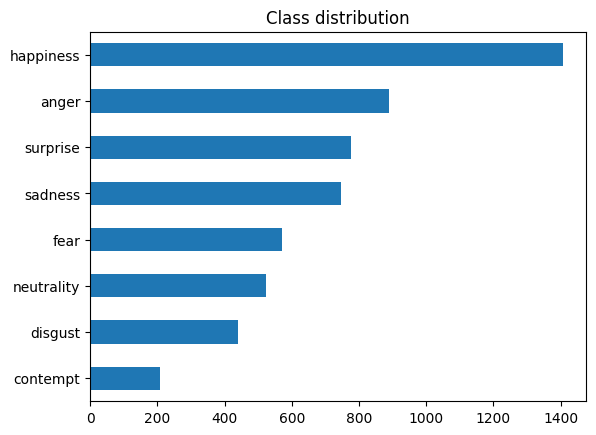

In [ ]:
class_counts = {cls: len(os.listdir(os.path.join(base_dir, cls)))
                for cls in os.listdir(base_dir)
                if os.path.isdir(os.path.join(base_dir, cls))}

pd.Series(class_counts).sort_values().plot(kind="barh", title="Class distribution");

In [19]:
class_counts

{'contempt': 208,
 'fear': 570,
 'surprise': 775,
 'sadness': 746,
 'neutrality': 524,
 'happiness': 1406,
 'anger': 890,
 'disgust': 439}

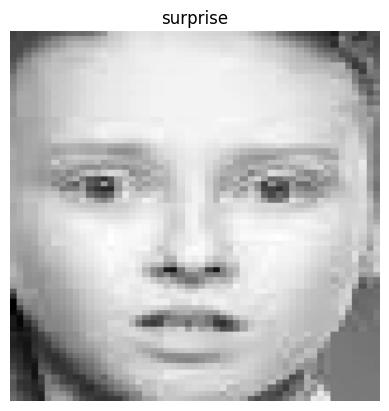

In [24]:
import matplotlib.image as mpimg

emotion = random.choice(list(class_counts.keys()))
img_path = os.path.join(base_dir, emotion, random.choice(os.listdir(os.path.join(base_dir, emotion))))
img = mpimg.imread(img_path)

plt.imshow(img, cmap='gray')
plt.title(emotion)
plt.axis("off")
plt.show()

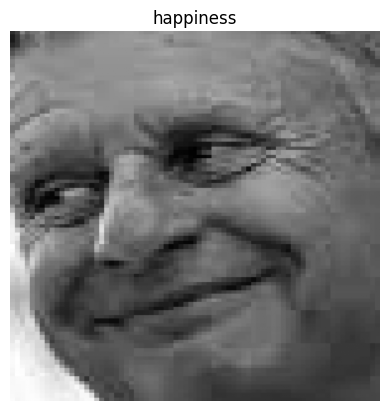

In [25]:
import matplotlib.image as mpimg

emotion = random.choice(list(class_counts.keys()))
img_path = os.path.join(base_dir, emotion, random.choice(os.listdir(os.path.join(base_dir, emotion))))
img = mpimg.imread(img_path)

plt.imshow(img, cmap='gray')
plt.title(emotion)
plt.axis("off")
plt.show()

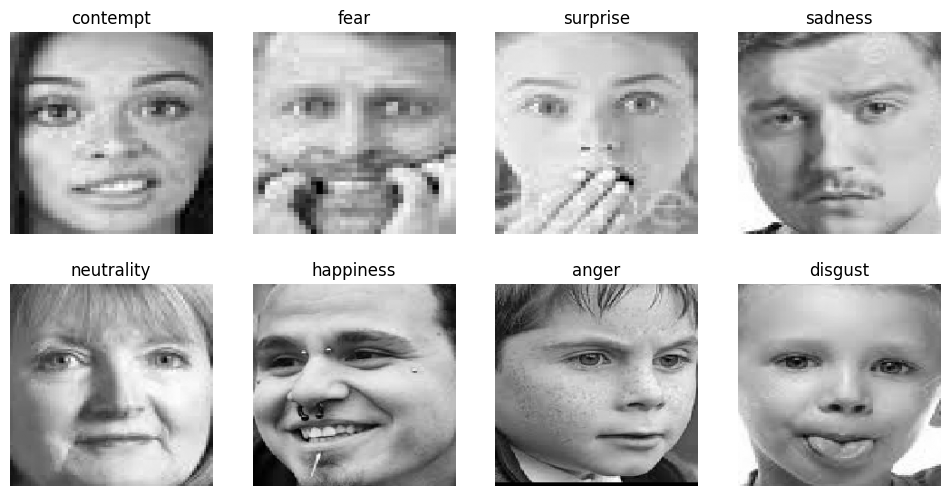

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(12,6))
for ax, emotion in zip(axes.flat, class_counts.keys()):
    img_path = os.path.join(base_dir, emotion, random.choice(os.listdir(os.path.join(base_dir, emotion))))
    ax.imshow(mpimg.imread(img_path), cmap='gray')
    ax.set_title(emotion)
    ax.axis("off")
plt.show()

In [15]:
sizes = []
for cls in class_counts:
    for img_name in os.listdir(os.path.join(base_dir, cls))[:50]:  # sample 50 per class
        with Image.open(os.path.join(base_dir, cls, img_name)) as im:
            sizes.append(im.size)

sizes = np.array(sizes)
print("Average size:", sizes.mean(axis=0))
print("Min:", sizes.min(axis=0), "Max:", sizes.max(axis=0))

Average size: [224. 224.]
Min: [224 224] Max: [224 224]


In [ ]:
avg_intensity = {}

for emotion in os.listdir(base_dir):
    folder = os.path.join(base_dir, emotion)
    if not os.path.isdir(folder):
        continue

    intensities = []

    # sample all images (or limit for speed, e.g., [:100])
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path).convert("L")  # convert to grayscale
            intensities.append(np.array(img).mean())
        except:
            continue

    avg_intensity[emotion] = np.mean(intensities)


['contempt', 'fear', 'surprise', 'sadness', 'neutrality', 'happiness', 'anger', 'disgust']


In [22]:
avg_intensity

{'contempt': np.float64(127.09826066093504),
 'fear': np.float64(136.316839077325),
 'surprise': np.float64(144.6456607708608),
 'sadness': np.float64(124.74086774874158),
 'neutrality': np.float64(126.22964246006727),
 'happiness': np.float64(135.95469937285904),
 'anger': np.float64(130.87839073875688),
 'disgust': np.float64(136.51224591488076)}

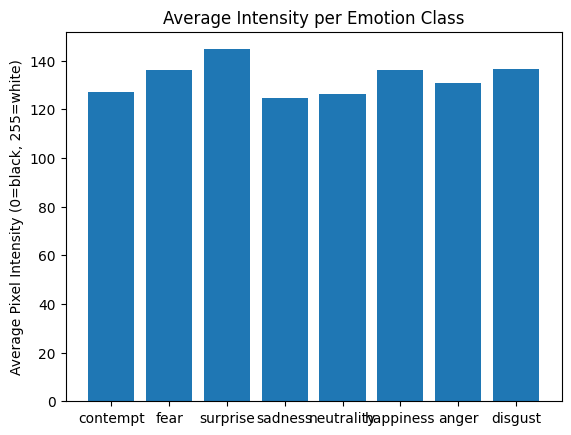

In [23]:
plt.bar(avg_intensity.keys(), avg_intensity.values())
plt.ylabel("Average Pixel Intensity (0=black, 255=white)")
plt.title("Average Intensity per Emotion Class")
plt.show()

# Notes 

all images are black and white, same size (224x224), have relatively same intensity
Conclusion: all images are pretty uniform, and look great



## Potential issues of images 

Some rotated images, but for the baseline model we don't need to worry

## Next steps

Create baseline model 